### Business Problem:

To ensure there is no discrimination between employees, it is imperative for the Human Resources department of Delta Ltd. to maintain a salary range for each employee with similar profiles
Apart from the existing salary, there is a considerable number of factors regarding an employee’s experience and other abilities to which they get evaluated in interviews. Given the data related to individuals who applied in Delta Ltd, models can be built that can automatically determine salary which should be offered if the prospective candidate is selected in the company. This model seeks to minimize human judgment with regard to salary to be offered.

### Goal & Objective: 

The objective of this exercise is to build a model, using historical data that will determine an employee's salary to be offered, such that manual judgments on selection are minimized. It is intended to have a robust approach and eliminate any discrimination in salary among similar employee profiles

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # for static plotting
import seaborn as sns            # for beautiful statistical visuals
import plotly.express as px      # for interactive visualizations
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('../data/expected_ctc.csv')
df.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [4]:
df.shape

(25000, 29)

### Dropping irrelevant columns

In [5]:
df = df.drop(["IDX", "Applicant_ID"], axis=1)

In [6]:
df.isnull().sum()

Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                  908
No_Of_Companies_worked                   0
Number_of_P

In [7]:
df.drop('Organization', axis=1, inplace=True)

In [8]:
cols_to_impute = ['Department', 'Role', 'Industry', 'Last_Appraisal_Rating','Designation']

for col in cols_to_impute:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\ritwi\AppData\Local\Temp\ipykernel_30620\3853076612.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### missing values in columns more than 30%

In [9]:
# Calculate % missing for each column
missing_percent = df.isnull().mean() * 100

# Show columns with more than 30% missing
high_missing_cols = missing_percent[missing_percent > 30].sort_values(ascending=False)
print(high_missing_cols)

University_PHD         47.524
PHD_Specialization     47.524
Passing_Year_Of_PHD    47.524
PG_Specialization      30.768
University_PG          30.768
Passing_Year_Of_PG     30.768
dtype: float64


In [10]:
# Set graduation info to missing indicator for Under Grad only
df.loc[df['Education'] == 'Under Grad', 'Graduation_Specialization'] = 'No_Graduation'
df.loc[df['Education'] == 'Under Grad', 'University_Grad'] = 'No_Graduation'
df.loc[df['Education'] == 'Under Grad', 'Passing_Year_Of_Graduation'] = -1

In [11]:
# Identify rows where PG is applicable
mask_pg = df['Education'].isin(['PG', 'Doctorate'])

# Impute only for those rows
df.loc[mask_pg, 'PG_Specialization'] = df.loc[mask_pg, 'PG_Specialization'].fillna(df['PG_Specialization'].mode()[0])
df.loc[mask_pg, 'University_PG'] = df.loc[mask_pg, 'University_PG'].fillna(df['University_PG'].mode()[0])
df.loc[mask_pg, 'Passing_Year_Of_PG'] = df.loc[mask_pg, 'Passing_Year_Of_PG'].fillna(df['Passing_Year_Of_PG'].median())

In [12]:
mask_no_pg = df['Education'].isin(['Grad', 'Under Grad'])

df.loc[mask_no_pg, 'PG_Specialization'] = 'No_PG'
df.loc[mask_no_pg, 'University_PG'] = 'No_PG'
df.loc[mask_no_pg, 'Passing_Year_Of_PG'] = -1


In [13]:
mask_phd = df['Education'] == 'Doctorate'

df.loc[mask_phd, 'PHD_Specialization'] = df.loc[mask_phd, 'PHD_Specialization'].fillna(df['PHD_Specialization'].mode()[0])
df.loc[mask_phd, 'University_PHD'] = df.loc[mask_phd, 'University_PHD'].fillna(df['University_PHD'].mode()[0])
df.loc[mask_phd, 'Passing_Year_Of_PHD'] = df.loc[mask_phd, 'Passing_Year_Of_PHD'].fillna(df['Passing_Year_Of_PHD'].median())

In [14]:
mask_no_phd = df['Education'].isin(['Grad', 'Under Grad', 'PG'])

df.loc[mask_no_phd, 'PHD_Specialization'] = 'No_PHD'
df.loc[mask_no_phd, 'University_PHD'] = 'No_PHD'
df.loc[mask_no_phd, 'Passing_Year_Of_PHD'] = -1

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Industry                           25000 non-null  object 
 5   Designation                        25000 non-null  object 
 6   Education                          25000 non-null  object 
 7   Graduation_Specialization          25000 non-null  object 
 8   University_Grad                    25000 non-null  object 
 9   Passing_Year_Of_Graduation         25000 non-null  float64
 10  PG_Specialization                  25000 non-null  object 
 11  University_PG                      25000 non-null  obj

Text(0.5, 1.0, 'Distribution of Expected CTC')

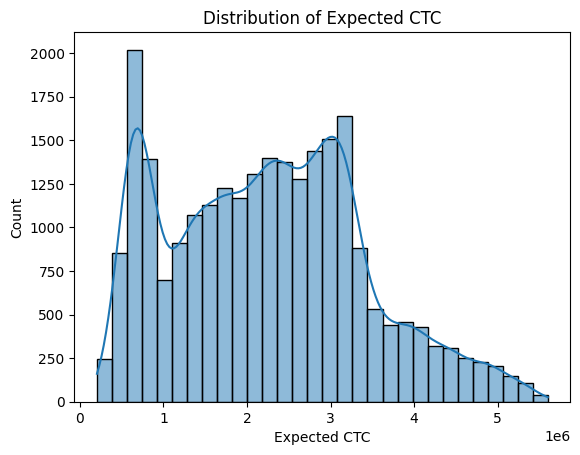

In [16]:
sns.histplot(df['Expected_CTC'], bins=30, kde=True)
plt.xlabel("Expected CTC")
plt.title("Distribution of Expected CTC")

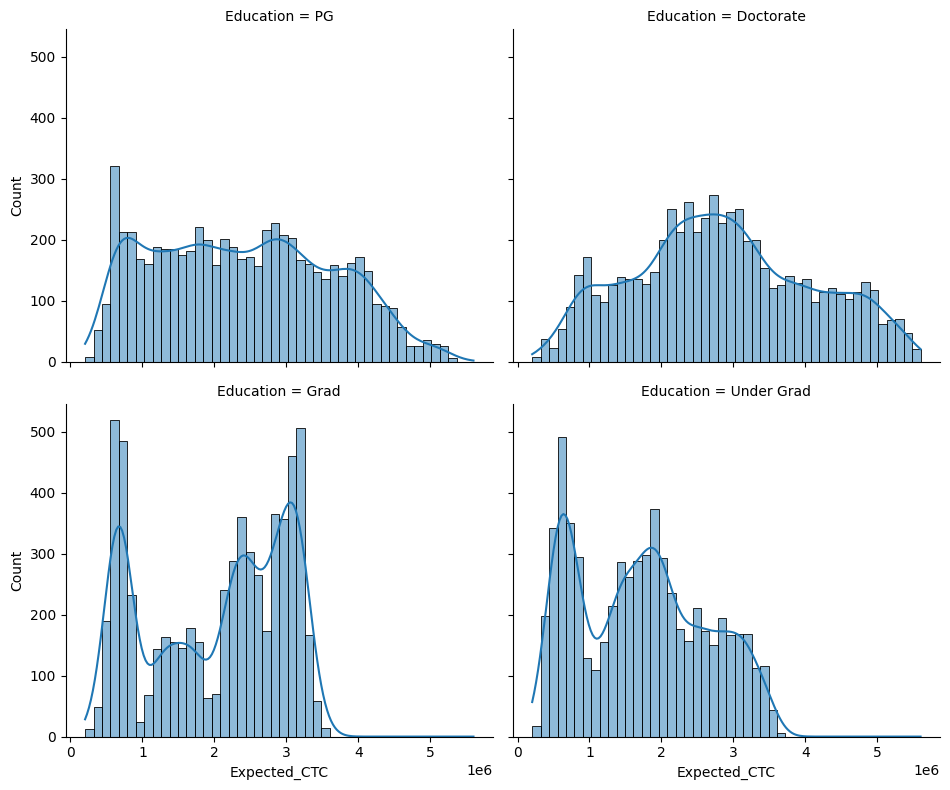

In [17]:
sns.displot(data=df, x='Expected_CTC', col='Education', kde=True, col_wrap=2, height=4, aspect=1.2)

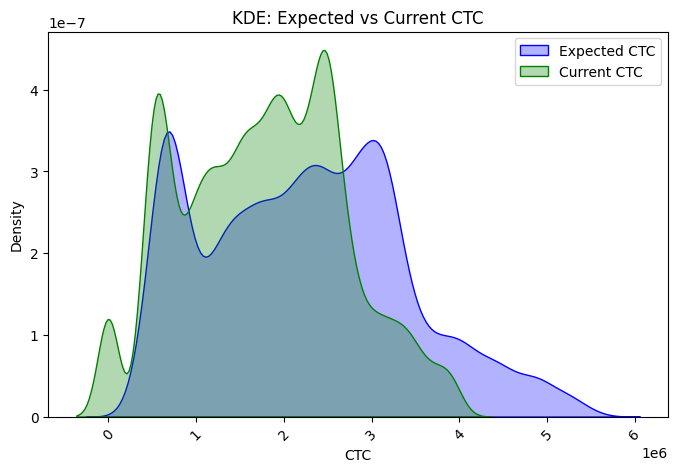

In [18]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Expected_CTC'], label='Expected CTC', color='blue', fill=True, alpha=0.3)
sns.kdeplot(df['Current_CTC'], label='Current CTC', color='green', fill=True, alpha=0.3)

plt.title("KDE: Expected vs Current CTC")
plt.xlabel("CTC")
plt.ylabel("Density")
plt.legend()
plt.xticks(rotation=45)
plt.show()

### KDE Comparison: Expected CTC vs Current CTC

This plot compares the smoothed distributions of `Expected_CTC` and `Current_CTC` using Kernel Density Estimation (KDE):

- **Expected CTC** (blue) is consistently **shifted to the right** of Current CTC (green), indicating that most candidates expect a higher salary than what they currently earn.
- The **Current CTC** distribution is more concentrated in the lower-to-mid salary range (e.g., ₹5–15L), with a steep drop-off beyond ₹25L.
- The **Expected CTC** has a wider and more gradual spread, suggesting varied salary ambitions — especially in the higher range (₹20L+).
- The overlapping area reflects candidates whose current and expected salaries fall within a similar band, but most of the density is skewed toward higher expectations.

This visualization confirms the general trend that job applicants anticipate salary hikes — helpful for modeling, negotiation analytics, or designing compensation strategies.

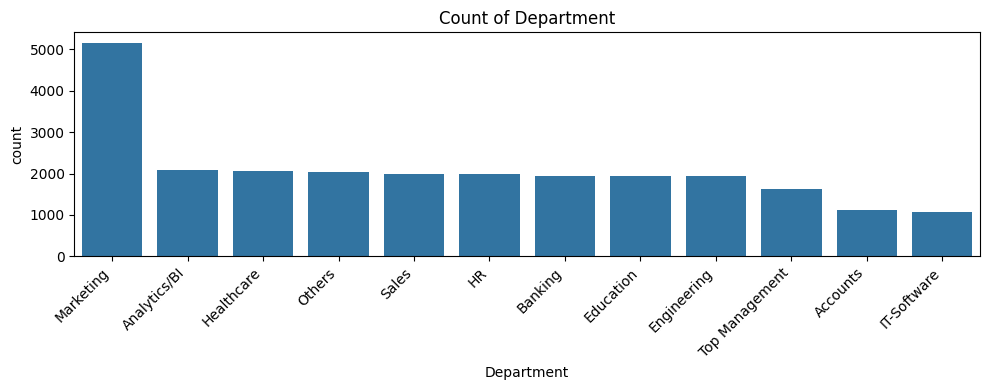

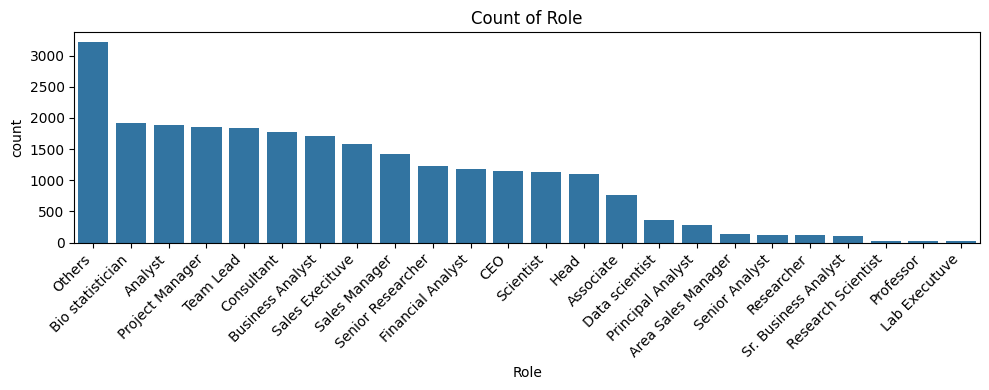

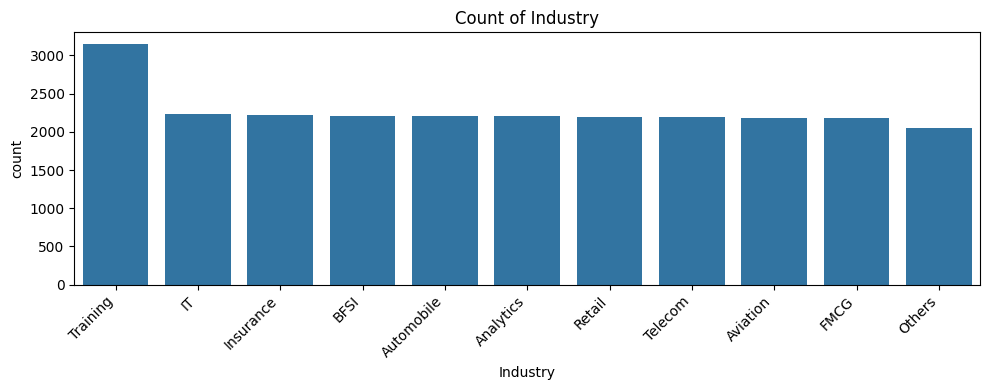

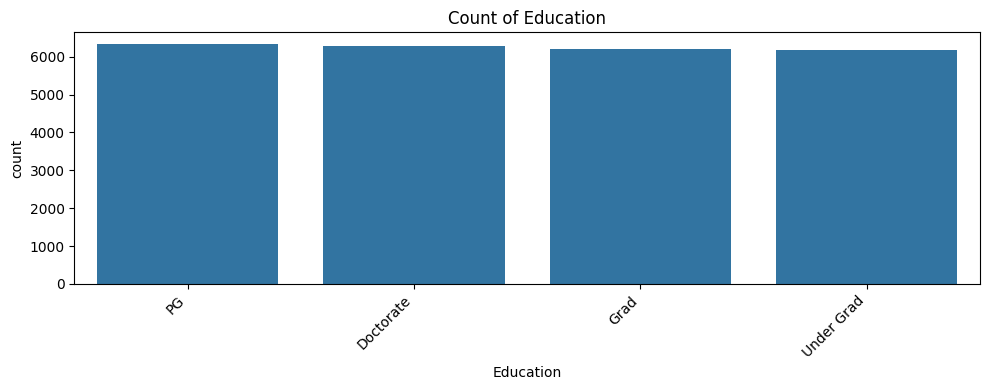

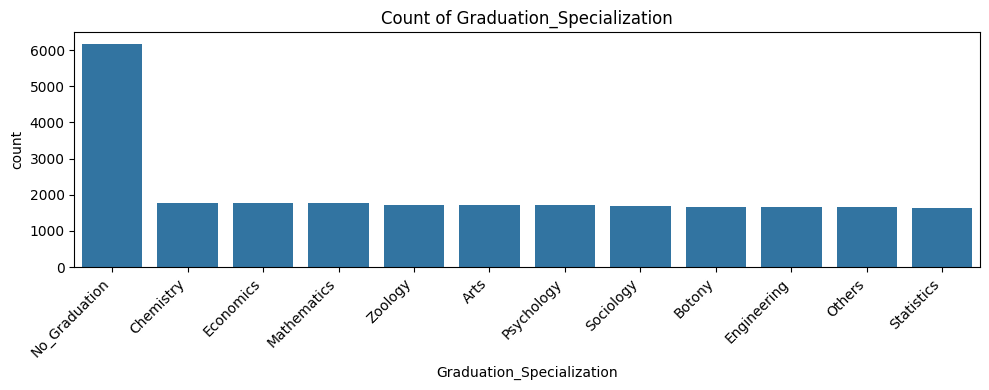

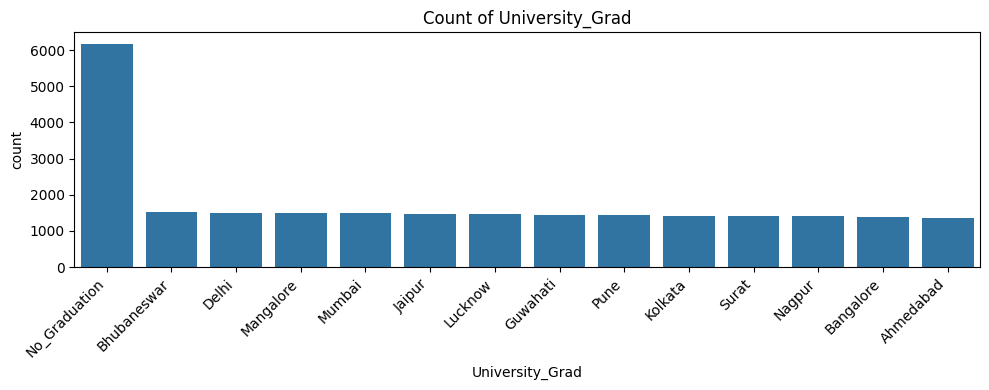

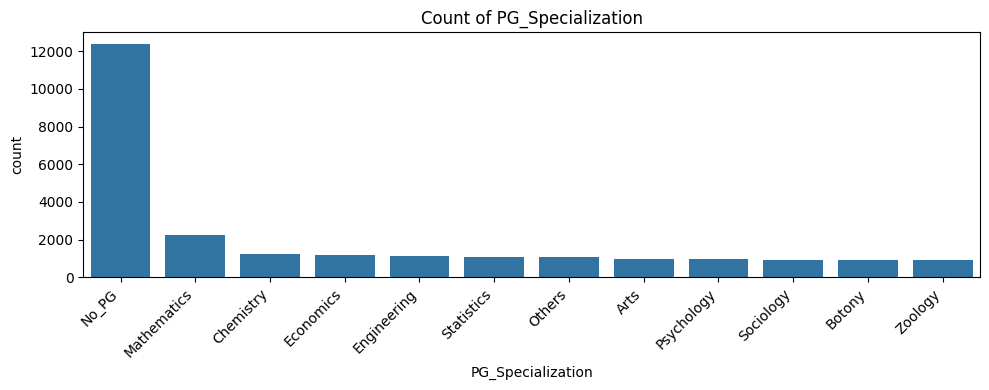

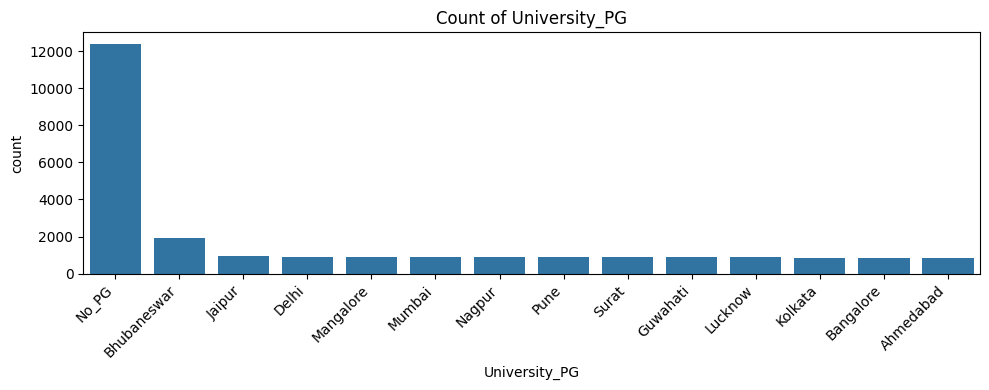

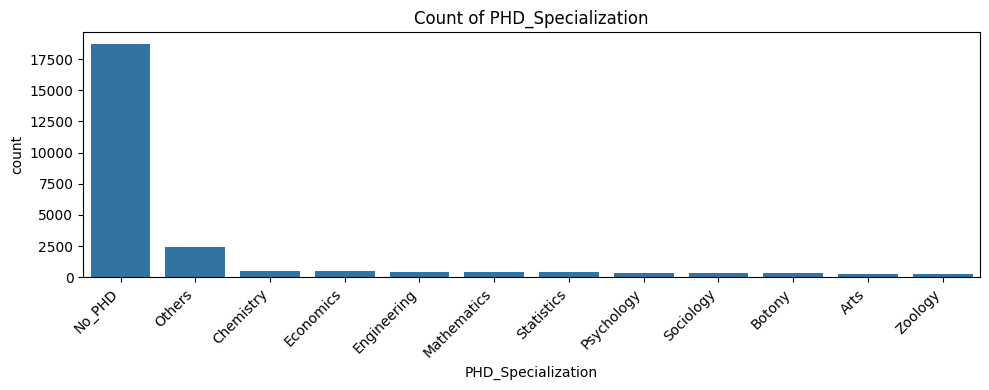

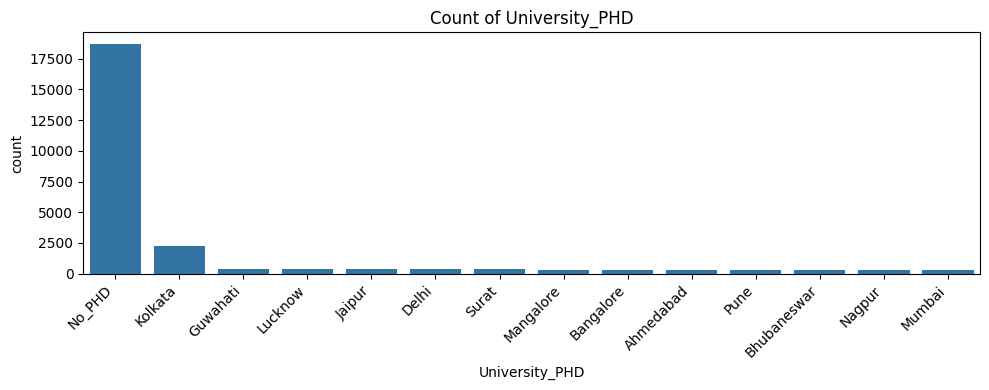

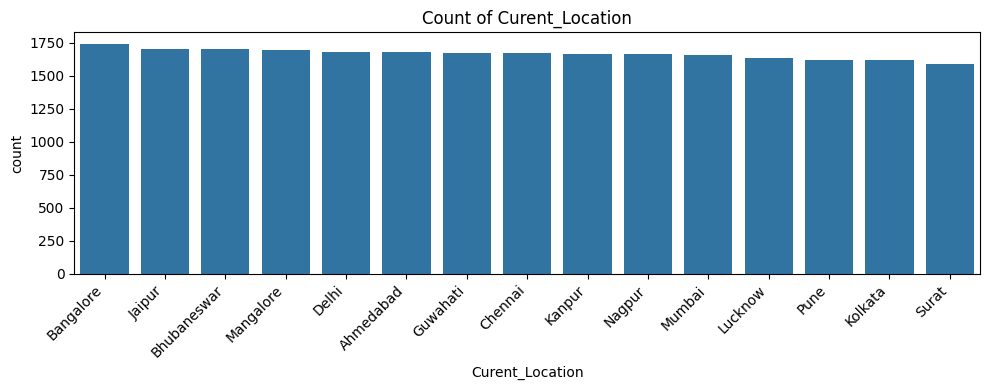

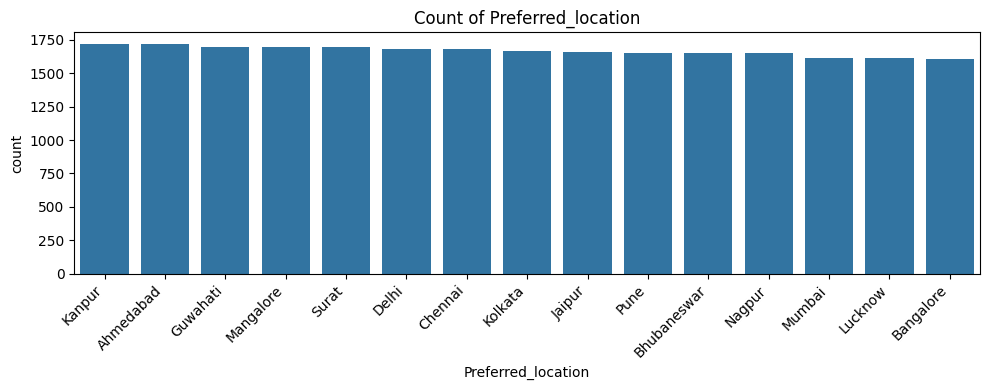

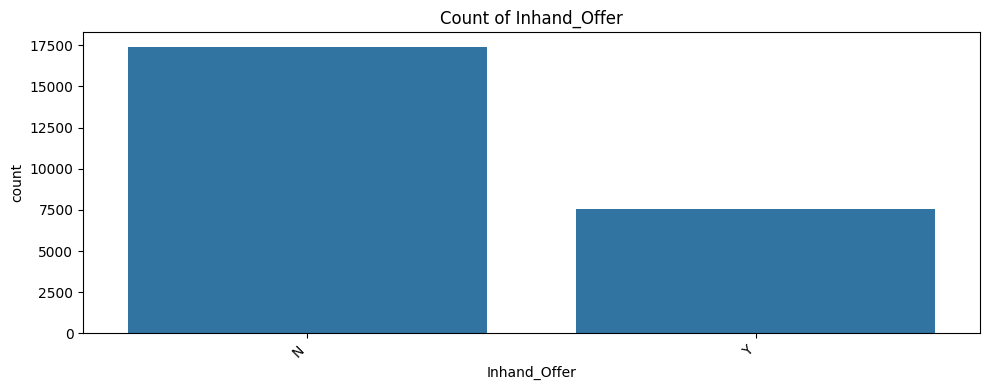

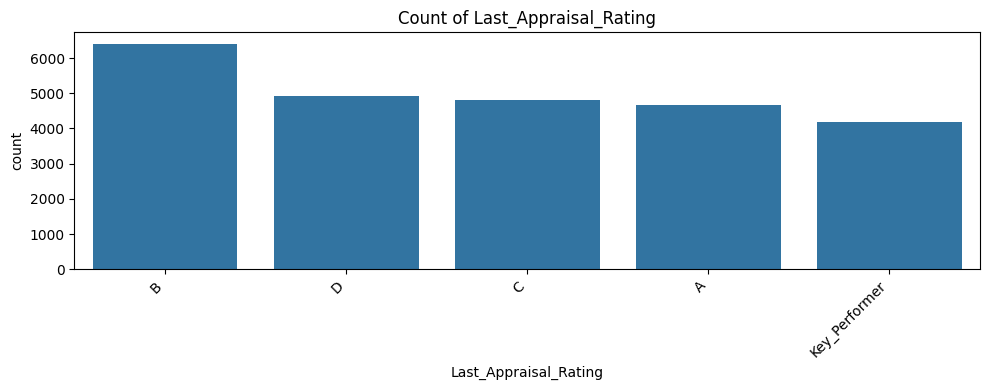

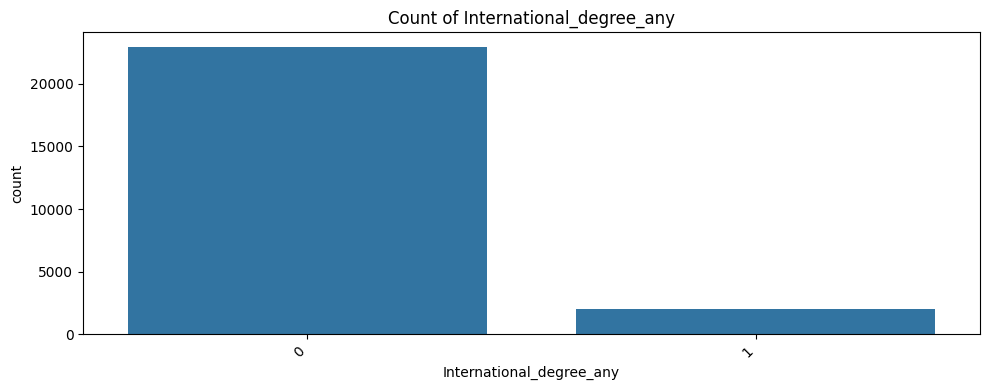

In [19]:
categorical_cols = [
    'Department', 'Role', 'Industry', 'Education',
    'Graduation_Specialization', 'University_Grad', 'PG_Specialization',
    'University_PG', 'PHD_Specialization', 'University_PHD',
    'Curent_Location', 'Preferred_location', 'Inhand_Offer',
    'Last_Appraisal_Rating', 'International_degree_any'
]

for col in categorical_cols:
    plt.figure(figsize=(10, 4))  # Optional: Adjust figure size for clarity
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotates x-labels for readability
    plt.tight_layout()  # Adjusts spacing
    plt.show()

Text(0.5, 1.0, 'Distribution of Expected CTC')

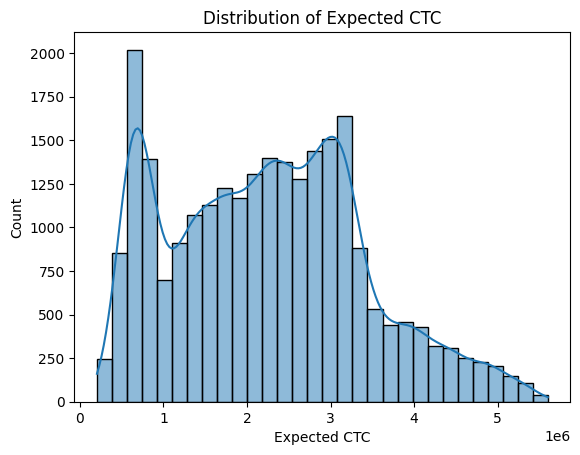

In [20]:
sns.histplot(df['Expected_CTC'], bins=30, kde=True)
plt.xlabel("Expected CTC")
plt.title("Distribution of Expected CTC")

### Distribution of Expected CTC

The histogram of the `Expected_CTC` variable reveals several important insights:

- **Multi-modal Distribution**: There are multiple peaks in the distribution, suggesting the presence of distinct groups within the data — potentially reflecting different experience levels, industries, or job roles.

- **Right-Skewed**: The distribution has a long tail to the right, indicating a few candidates expect significantly higher compensation. This skewness suggests that the mean `Expected_CTC` is likely higher than the median.

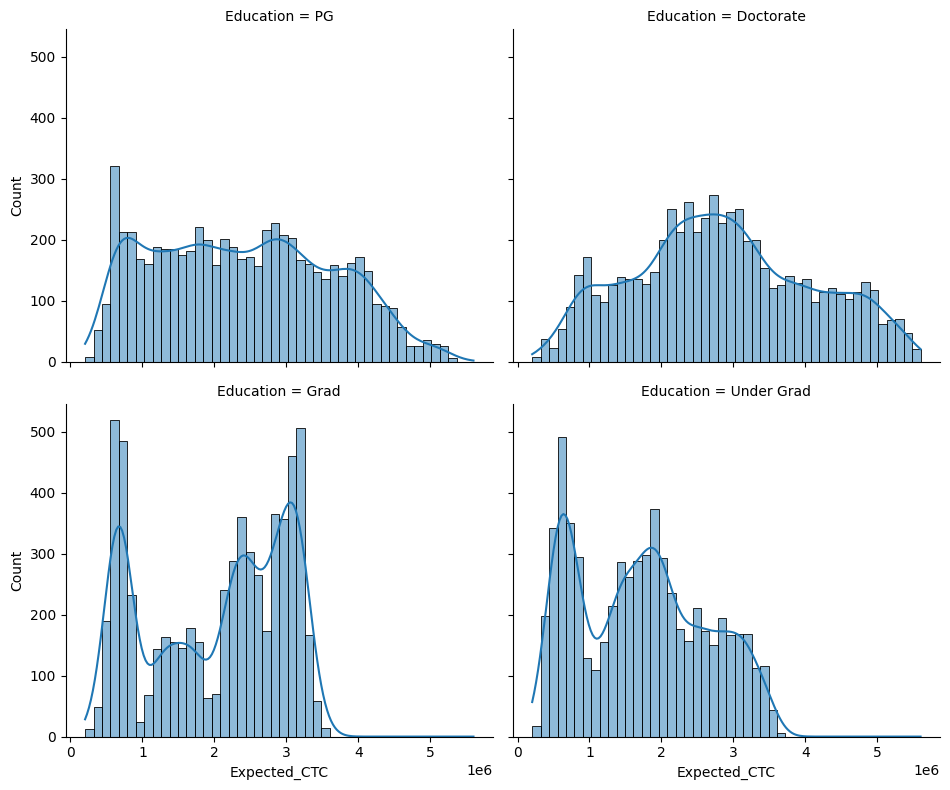

In [21]:
sns.displot(data=df, x='Expected_CTC', col='Education', kde=True, col_wrap=2, height=4, aspect=1.2)

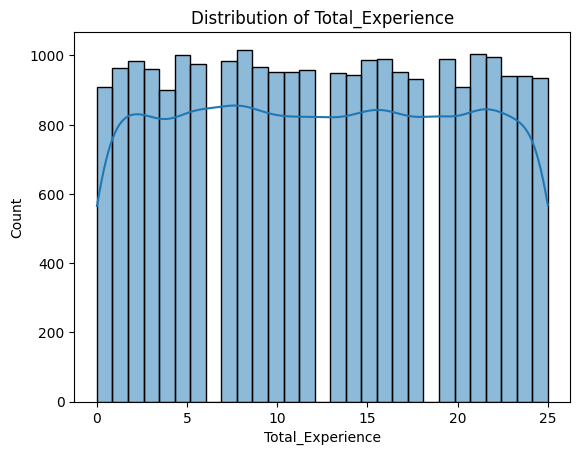

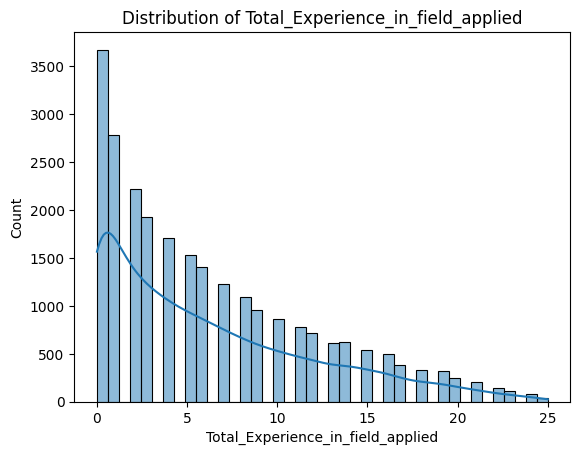

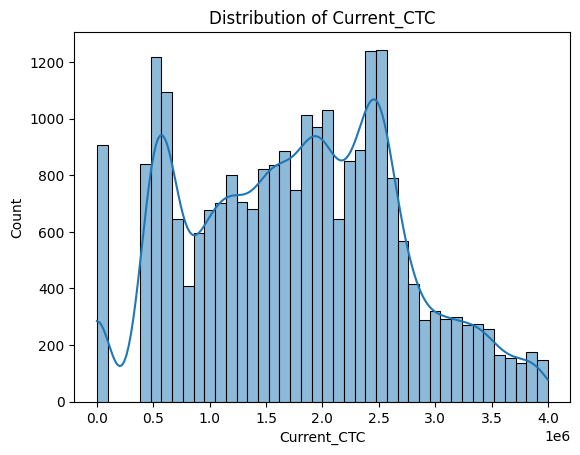

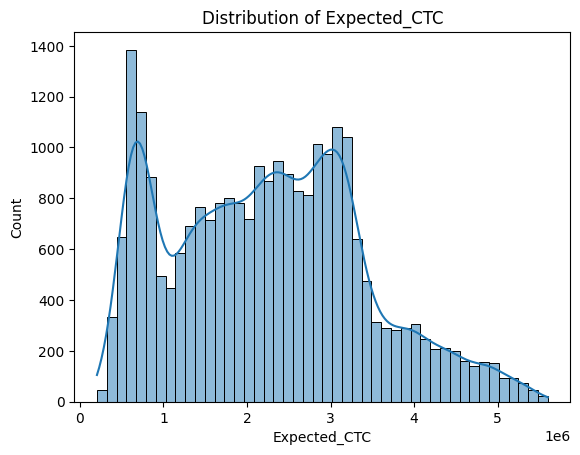

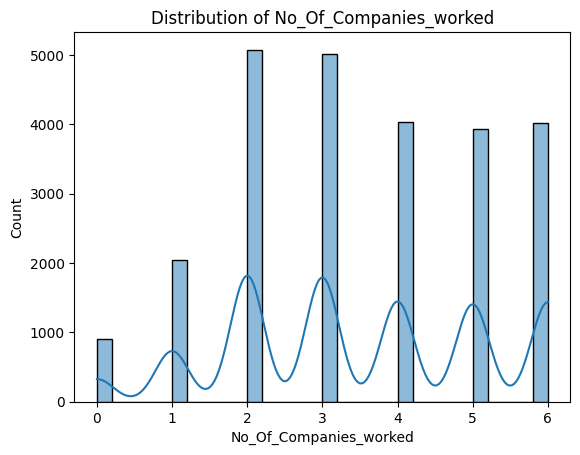

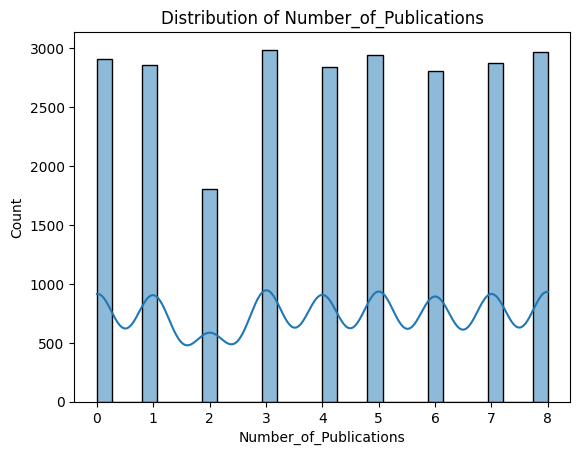

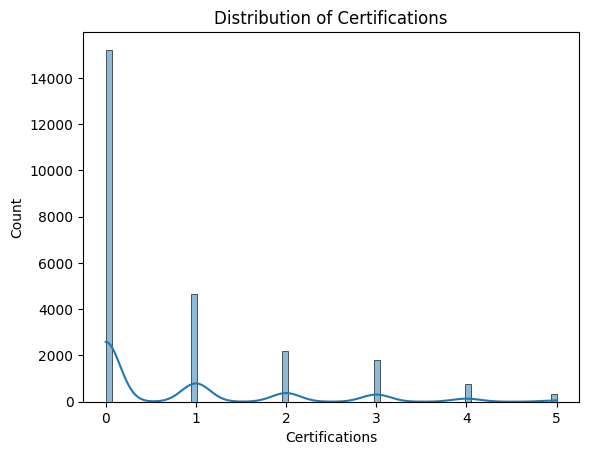

In [22]:
continuous_cols = [
    'Total_Experience', 'Total_Experience_in_field_applied',
    'Current_CTC', 'Expected_CTC', 'No_Of_Companies_worked',
    'Number_of_Publications', 'Certifications'
]

for col in continuous_cols:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



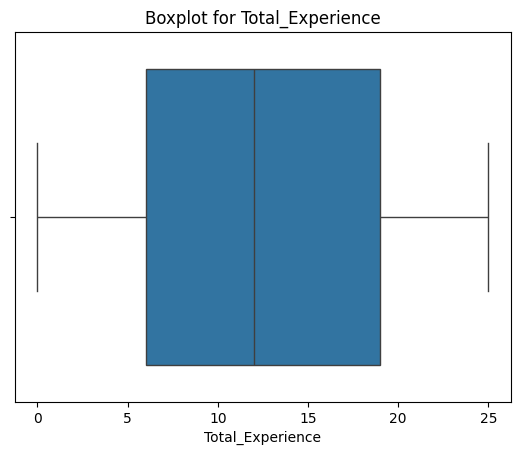

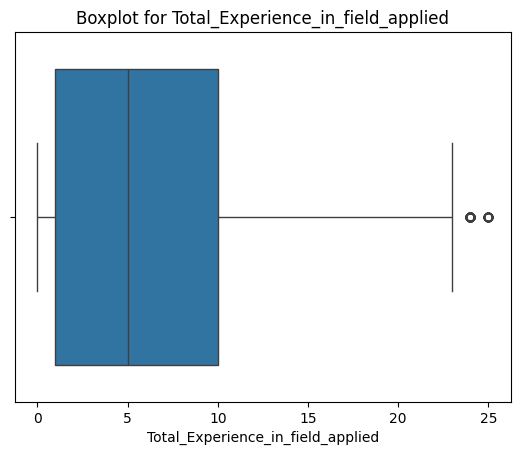

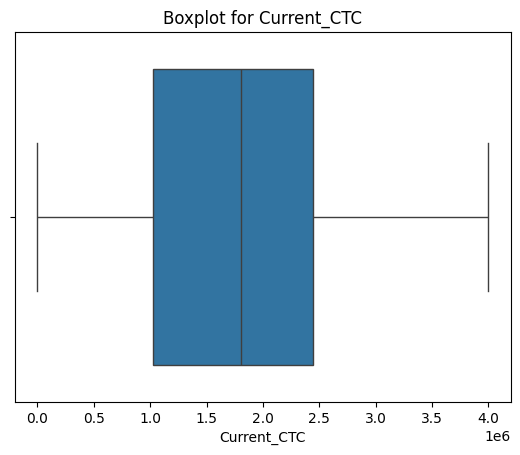

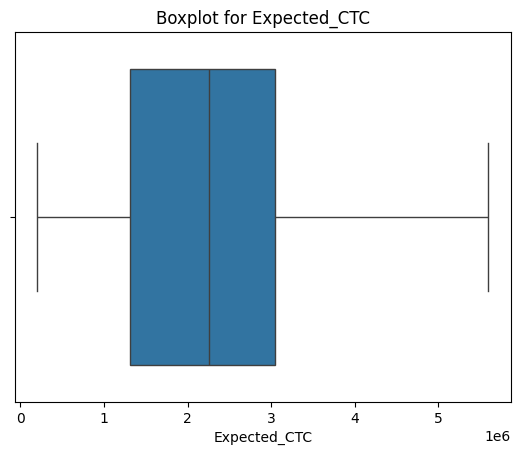

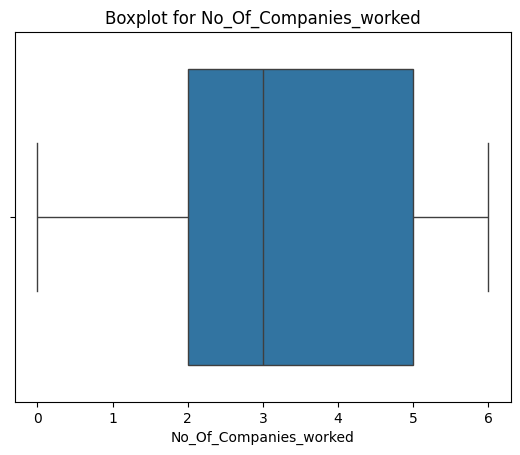

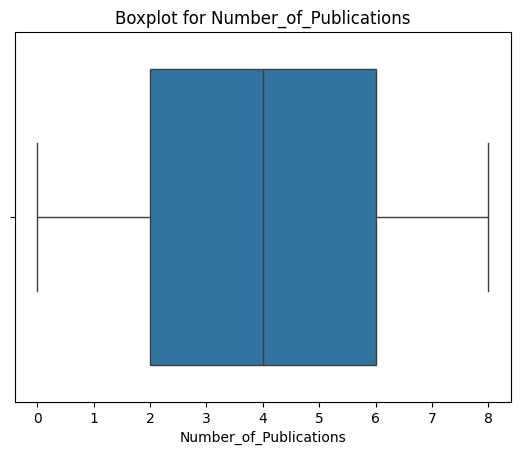

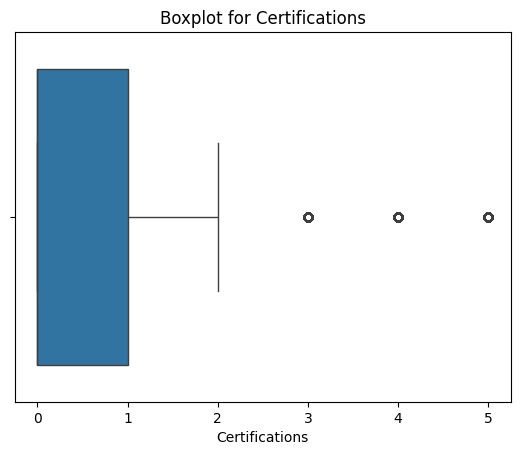

In [23]:
for col in continuous_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [24]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n--- Value Counts for: {col} ---")
    print(df[col].value_counts(dropna=False))  


--- Value Counts for: Department ---
Department
Marketing         5157
Analytics/BI      2096
Healthcare        2062
Others            2041
Sales             1991
HR                1988
Banking           1952
Education         1948
Engineering       1937
Top Management    1632
Accounts          1118
IT-Software       1078
Name: count, dtype: int64

--- Value Counts for: Role ---
Role
Others                  3211
Bio statistician        1913
Analyst                 1892
Project Manager         1850
Team Lead               1833
Consultant              1780
Business Analyst        1711
Sales Execituve         1574
Sales Manager           1427
Senior Researcher       1236
Financial Analyst       1182
CEO                     1149
Scientist               1139
Head                    1108
Associate                767
Data scientist           363
Principal Analyst        275
Area Sales Manager       134
Senior Analyst           128
Researcher               123
Sr. Business Analyst     114
Res

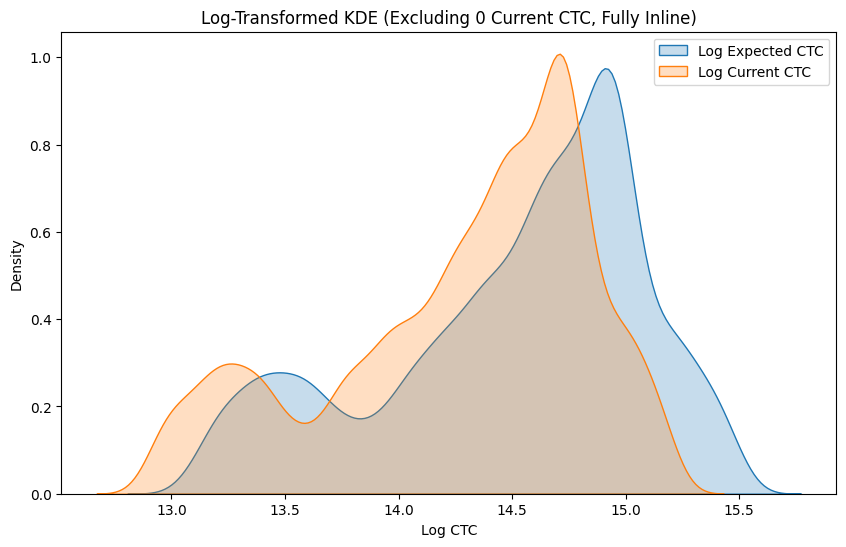

In [25]:
plt.figure(figsize=(10, 6))  # Create figure FIRST
sns.kdeplot(np.log1p(df.loc[df['Current_CTC'] > 0, 'Expected_CTC']), label='Log Expected CTC', fill=True)
sns.kdeplot(np.log1p(df.loc[df['Current_CTC'] > 0, 'Current_CTC']), label='Log Current CTC', fill=True)
plt.legend()
plt.title("Log-Transformed KDE (Excluding 0 Current CTC, Fully Inline)")
plt.xlabel("Log CTC")
plt.ylabel("Density")
plt.show()

### Log-Transformed KDE Plot: Expected vs. Current CTC

This plot compares the distributions of **Expected CTC** and **Current CTC** (log-transformed) for candidates with `Current_CTC > 0`.

#### Key Observations:
- The **blue curve** (Log Expected CTC) is consistently **shifted to the right** of the **orange curve** (Log Current CTC), indicating that most candidates expect a higher salary than what they are currently earning.
- The **peak of the expected CTC** is sharper and lies around a higher salary range (log scale ~15), suggesting a common salary expectation among candidates.
- The **left tail** of the current CTC distribution shows a few candidates earning significantly less, possibly outliers or underpaid professionals.

#### Interpretation:
- This confirms the presence of a salary expectation premium.
- The log transformation successfully normalized the skew in the salary data and made the distribution more comparable.
- This insight supports using `log(Expected_CTC)` as the target variable for regression modeling.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Industry                           25000 non-null  object 
 5   Designation                        25000 non-null  object 
 6   Education                          25000 non-null  object 
 7   Graduation_Specialization          25000 non-null  object 
 8   University_Grad                    25000 non-null  object 
 9   Passing_Year_Of_Graduation         25000 non-null  float64
 10  PG_Specialization                  25000 non-null  object 
 11  University_PG                      25000 non-null  obj

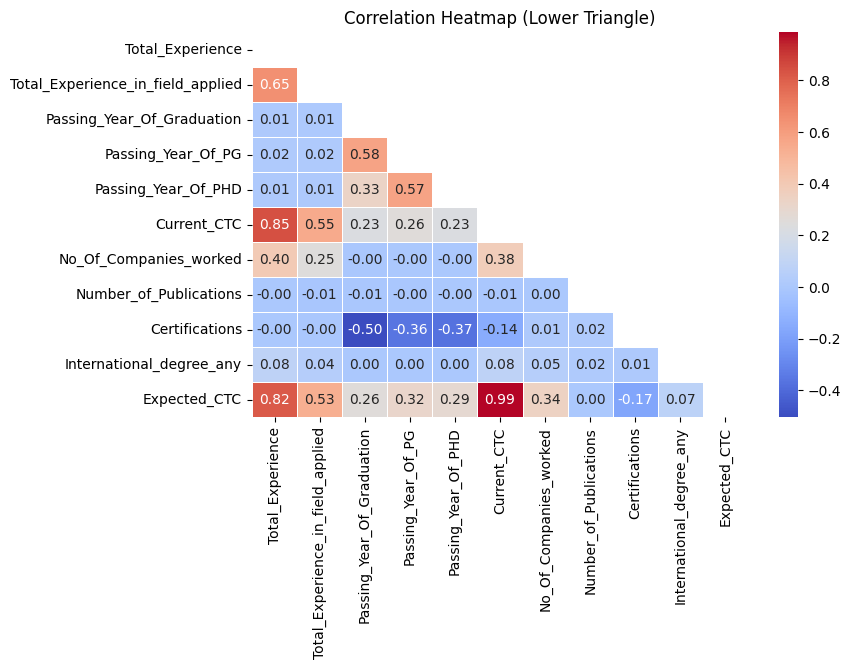

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
corr = df.select_dtypes(include='number').corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Draw the heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()


In [28]:
from datetime import datetime
current_year = datetime.now().year

df['Years_Since_Graduation'] = df['Passing_Year_Of_Graduation'].apply(
    lambda x: current_year - x if x != -1 else -1
)
df['Years_Since_PG'] = df['Passing_Year_Of_PG'].apply(
    lambda x: current_year - x if x != -1 else -1
)
df['Years_Since_PHD'] = df['Passing_Year_Of_PHD'].apply(
    lambda x: current_year - x if x != -1 else -1
)


In [29]:
df['Years_Since_Graduation'] = df['Years_Since_Graduation'].astype(int)
df['Years_Since_PG'] = df['Years_Since_PG'].astype(int)
df['Years_Since_PHD'] = df['Years_Since_PHD'].astype(int)


In [30]:
df.drop(['Passing_Year_Of_Graduation', 'Passing_Year_Of_PG', 'Passing_Year_Of_PHD'], axis=1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Experience                   25000 non-null  int64 
 1   Total_Experience_in_field_applied  25000 non-null  int64 
 2   Department                         25000 non-null  object
 3   Role                               25000 non-null  object
 4   Industry                           25000 non-null  object
 5   Designation                        25000 non-null  object
 6   Education                          25000 non-null  object
 7   Graduation_Specialization          25000 non-null  object
 8   University_Grad                    25000 non-null  object
 9   PG_Specialization                  25000 non-null  object
 10  University_PG                      25000 non-null  object
 11  PHD_Specialization                 25000 non-null  object
 12  Univ

In [32]:
df.drop([
    'University_PG', 'University_PHD','University_Grad',
], axis=1, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Experience                   25000 non-null  int64 
 1   Total_Experience_in_field_applied  25000 non-null  int64 
 2   Department                         25000 non-null  object
 3   Role                               25000 non-null  object
 4   Industry                           25000 non-null  object
 5   Designation                        25000 non-null  object
 6   Education                          25000 non-null  object
 7   Graduation_Specialization          25000 non-null  object
 8   PG_Specialization                  25000 non-null  object
 9   PHD_Specialization                 25000 non-null  object
 10  Curent_Location                    25000 non-null  object
 11  Preferred_location                 25000 non-null  object
 12  Curr

In [34]:
for col in ['Graduation_Specialization', 'Role', 'Designation', 'Curent_Location', 'Preferred_location']:
    print(f"{col}: {df[col].nunique()} unique values")


Graduation_Specialization: 12 unique values
Role: 24 unique values
Designation: 18 unique values
Curent_Location: 15 unique values
Preferred_location: 15 unique values


In [35]:
df['Is_Fresher'] = (df['Current_CTC'] == 0).astype(int)


In [36]:
df['Inhand_Offer'] = df['Inhand_Offer'].map({'Y': 1, 'N': 0})

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Experience                   25000 non-null  int64 
 1   Total_Experience_in_field_applied  25000 non-null  int64 
 2   Department                         25000 non-null  object
 3   Role                               25000 non-null  object
 4   Industry                           25000 non-null  object
 5   Designation                        25000 non-null  object
 6   Education                          25000 non-null  object
 7   Graduation_Specialization          25000 non-null  object
 8   PG_Specialization                  25000 non-null  object
 9   PHD_Specialization                 25000 non-null  object
 10  Curent_Location                    25000 non-null  object
 11  Preferred_location                 25000 non-null  object
 12  Curr

In [38]:
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Graduation_Specialization,PG_Specialization,PHD_Specialization,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC,Years_Since_Graduation,Years_Since_PG,Years_Since_PHD,Is_Fresher
0,0,0,Marketing,Others,Training,HR,PG,Arts,Mathematics,No_PHD,Guwahati,Pune,0,0,B,0,0,0,0,384551,5,19,-1,1
1,23,14,HR,Consultant,Analytics,HR,Doctorate,Chemistry,Others,Chemistry,Bangalore,Nagpur,2702664,1,Key_Performer,2,4,0,0,3783729,37,35,28,0
2,21,12,Top Management,Consultant,Training,HR,Doctorate,Zoology,Zoology,Zoology,Ahmedabad,Jaipur,2236661,1,Key_Performer,5,3,0,0,3131325,35,33,26,0
3,15,8,Banking,Financial Analyst,Aviation,HR,Doctorate,Others,Zoology,Chemistry,Kanpur,Kolkata,2100510,0,C,5,3,0,0,2608833,28,26,20,0
4,10,5,Sales,Project Manager,Insurance,Medical Officer,Grad,Zoology,No_PG,No_PHD,Ahmedabad,Ahmedabad,1931644,0,C,2,3,0,0,2221390,21,-1,-1,0


In [57]:
import numpy as np

df['Expected_CTC_Log'] = np.log1p(df['Expected_CTC'])
df['Current_CTC_Log'] = np.log1p(df['Current_CTC'])


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Industry                           25000 non-null  object 
 5   Designation                        25000 non-null  object 
 6   Education                          25000 non-null  object 
 7   Graduation_Specialization          25000 non-null  object 
 8   PG_Specialization                  25000 non-null  object 
 9   PHD_Specialization                 25000 non-null  object 
 10  Curent_Location                    25000 non-null  object 
 11  Preferred_location                 25000 non-null  obj

In [60]:
df = df.drop(columns=['Expected_CTC', 'Current_CTC'])


In [62]:
from sklearn.model_selection import train_test_split

# Define target and features
target = 'Expected_CTC_Log'
X = df.drop(columns=[target])
y = df[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include='number').columns.tolist()


In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)



In [65]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Full modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [66]:
model.fit(X_train, y_train)


c:\Users\ritwi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Department', 'Role',
                                                   'Industry', 'Designation',
                                                   'Education',
                                                   'Graduation_Specialization',
                                                   'PG_Specialization',
                                                   'PHD_Specialization',
                                                   'Curent_Location',
                                                   'Preferred_location',
                                                   'Last_Appraisal_Rating'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.008070453487587378
RMSE: 0.027266671473612232
R² Score: 0.998088631610651


In [70]:
# Predict and invert train predictions
y_train_pred_log = model.predict(X_train)
y_train_pred_actual = np.expm1(y_train_pred_log)
y_train_actual = np.expm1(y_train)

# Predict and invert test predictions
y_test_pred_log = model.predict(X_test)
y_test_pred_actual = np.expm1(y_test_pred_log)
y_test_actual = np.expm1(y_test)

# Metrics in ₹ scale
print("MAE (₹):", mean_absolute_error(y_test_actual, y_test_pred_actual))
print("RMSE (₹):", np.sqrt(mean_squared_error(y_test_actual, y_test_pred_actual)))
print("R² Test (₹):", r2_score(y_test_actual, y_test_pred_actual))
print("R² Train (₹):", r2_score(y_train_actual, y_train_pred_actual))


MAE (₹): 9747.597337770656
RMSE (₹): 21893.57152110924
R² Test (₹): 0.9996455919567726
R² Train (₹): 0.9999521634005993


In [71]:
X_no_ctc = X.drop(columns=['Current_CTC_Log'])



In [50]:
from sklearn.model_selection import train_test_split

X_train_no_ctc, X_test_no_ctc, y_train, y_test = train_test_split(
    X_no_ctc, y, test_size=0.2, random_state=42
)


In [72]:
model_no_ctc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model_no_ctc.fit(X_train_no_ctc, y_train)



c:\Users\ritwi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Department', 'Role',
                                                   'Industry', 'Designation',
                                                   'Education',
                                                   'Graduation_Specialization',
                                                   'PG_Specialization',
                                                   'PHD_Specialization',
                                                   'Curent_Location',
                                                   'Preferred_location',
                                                   'Last_Appraisal_Rating'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [73]:
# Predict log CTC
y_pred_log = model_no_ctc.predict(X_test_no_ctc)

# Invert log1p to get salary in ₹
import numpy as np
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE (₹):", mean_absolute_error(y_test_actual, y_pred_actual))
print("RMSE (₹):", np.sqrt(mean_squared_error(y_test_actual, y_pred_actual)))
print("R² Score:", r2_score(y_test_actual, y_pred_actual))


MAE (₹): 265291.06912807515
RMSE (₹): 371008.9151225387
R² Score: 0.8982254871682247


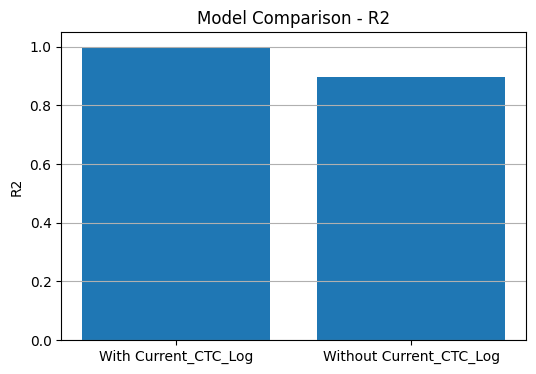

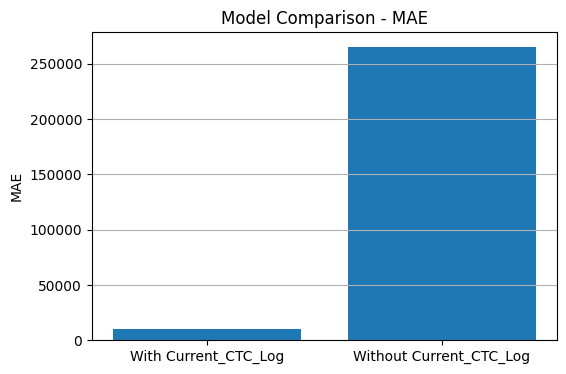

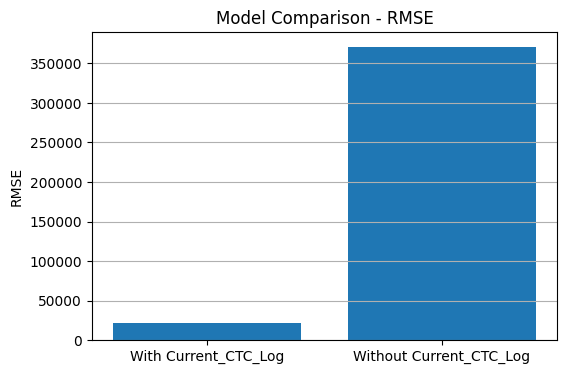

In [74]:
import matplotlib.pyplot as plt

# Store results for both models
model_results = {
    "With Current_CTC_Log": {
        "R2": 0.9996,
        "MAE": 9748,
        "RMSE": 21894
    },
    "Without Current_CTC_Log": {
        "R2": 0.8982,
        "MAE": 265291,
        "RMSE": 371009
    }
}

# Plot R², MAE, RMSE comparison
metrics = ['R2', 'MAE', 'RMSE']
x = list(model_results.keys())

for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.bar(x, [model_results[m][metric] for m in x])
    plt.title(f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.grid(True, axis='y')
    plt.show()


# Salary Prediction Model Summary

### 🎯 Goal:
Predict fair and consistent `Expected_CTC` using employee profile data.

---

## 🔍 Model Variants Compared

| Model Version            | R² Score | MAE (₹) | RMSE (₹) | Notes                                |
|--------------------------|----------|---------|----------|--------------------------------------|
| With `Current_CTC_Log`   | 0.9996   | ₹9.7K   | ₹21.9K   | Highly accurate, leverages current pay |
| Without `Current_CTC_Log`| 0.8982   | ₹265K   | ₹371K    | More fair, profile-only              |

---

## 🧠 Interpretation:
- Including `Current_CTC_Log` yields **precise but biased** predictions (matches existing salary trends).
- Excluding it gives a **fair benchmark**, relying on skills, role, experience, etc.

---

## ✅ Use Case Guidance:

| Scenario                        | Recommended Model             |
|----------------------------------|-------------------------------|
| Internal benchmarking / fairness | Without `Current_CTC_Log`     |
| Offer negotiation / matching     | With `Current_CTC_Log`        |

---


In [75]:
import joblib

# Model using Current_CTC_Log
joblib.dump(model, 'expected_ctc_with_ctc.pkl')

# Model without Current_CTC_Log
joblib.dump(model_no_ctc, 'expected_ctc_without_ctc.pkl')


['expected_ctc_without_ctc.pkl']